In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load  
from sklearn.metrics import roc_curve,auc

In [8]:
model = load('/home/Task/02_stable_reverse_gene_pair/svm_model.joblib')
alpha_encoding = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/alpha_encoding.csv",index_col=0)
beta_encoding = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/beta_encoding.csv",index_col=0)
delta_encoding = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/delta_encoding.csv",index_col=0)
gamma_encoding = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/gamma_encoding.csv",index_col=0)

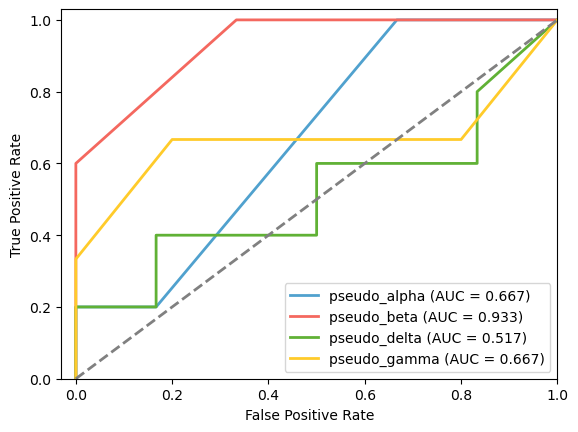

In [9]:
alpha_fpr, alpha_tpr, _ = roc_curve(alpha_encoding.label, model.predict_proba(alpha_encoding.iloc[:,1:].values)[:,1])
alpha_auc = auc(alpha_fpr, alpha_tpr)
beta_fpr, beta_tpr, _ = roc_curve(beta_encoding.label, model.predict_proba(beta_encoding.iloc[:,1:].values)[:,1])
beta_auc = auc(beta_fpr, beta_tpr)
delta_fpr, delta_tpr, _ = roc_curve(delta_encoding.label, model.predict_proba(delta_encoding.iloc[:,1:].values)[:,1])
delta_auc = auc(delta_fpr, delta_tpr)
gamma_fpr, gamma_tpr, _ = roc_curve(gamma_encoding.label, model.predict_proba(gamma_encoding.iloc[:,1:].values)[:,1])
gamma_auc = auc(gamma_fpr, gamma_tpr)
plt.plot(alpha_fpr, alpha_tpr,color='#50a1ce',lw=2, label='pseudo_alpha (AUC = %0.3f)' % alpha_auc)
plt.plot(beta_fpr, beta_tpr,color="#f4685f",lw=2, label='pseudo_beta (AUC = %0.3f)' % beta_auc)
plt.plot(delta_fpr, delta_tpr,color='#60b135',lw=2, label='pseudo_delta (AUC = %0.3f)' % delta_auc)
plt.plot(gamma_fpr, gamma_tpr,color='#ffcb2a',lw=2, label='pseudo_gamma (AUC = %0.3f)' % gamma_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")